# Capstone Project by Cesar

# Identifying a suitable location to open a restaurant in Toronto

# Business Problem
In this project, I identify selected neighborhoods in Toronto where a person can open a restaurant. The selection of the neighborhoods depends on the requirements of the person/client. The client’s requirements are:
- Location must be a safe place where breaking and entering crimes are low.
- There should be a few or no restaurants in a 500-meter radius from location.
- There should be commercial buildings/offices nearby where employees go to work.
- Location must be near parks. Client likes parks and think people will gather there and eventually eat at his restaurant.


# Data
 - Toronto Police Website http://data.torontopolice.on.ca/pages/open-data
 
 - Venues from Foursquare

# Methodology
- Select number of neighborhoods that are safe
- Cluster Neighborhoods using kmeans clustering and elbow method
- Select target neighborhoods that meet client's requirements

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import requests

### Loading breaking & entering crime data from http://data.torontopolice.on.ca/pages/open-data

In [2]:
dfcrime=pd.read_csv('Break_and_Enter_2014_to_2019.csv', sep = ',')
print(dfcrime.shape)
dfcrime.head(7)


(43302, 27)


,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,714,GO-20141857431,1397050200000,1397050740000,House,2120,200,B&E,2014,April,...,99.0,Wednesday,13,Break and Enter,D22,11,Eringate-Centennial-West Deane (11),-79.582176,43.661335,1
1,715,GO-20141859201,1397055600000,1397067540000,House,2120,200,B&E,2014,April,...,99.0,Wednesday,15,Break and Enter,D33,47,Don Valley Village (47),-79.362968,43.773071,2
2,716,GO-20141866077,1397134800000,1397157060000,House,2120,220,B&E W'Intent,2014,April,...,100.0,Thursday,13,Break and Enter,D55,69,Blake-Jones (69),-79.332382,43.681484,3
3,719,GO-20141915866,1397816160000,1397844000000,Commercial,2120,200,B&E,2014,April,...,108.0,Friday,10,Break and Enter,D53,98,Rosedale-Moore Park (98),-79.386787,43.670227,4
4,724,GO-20141965079,1398545460000,1398545460000,House,2120,200,B&E,2014,April,...,116.0,Saturday,20,Break and Enter,D53,41,Bridle Path-Sunnybrook-York Mills (41),-79.381180,43.725376,5
5,725,GO-20141965200,1398528000000,1398546720000,House,2120,200,B&E,2014,April,...,116.0,Saturday,16,Break and Enter,D42,129,Agincourt North (129),-79.280647,43.806454,6
6,733,GO-20141382877,1390022760000,1390292460000,Apartment,2120,200,B&E,2014,January,...,18.0,Saturday,5,Break and Enter,D41,120,Clairlea-Birchmount (120),-79.272407,43.712444,7


### Gathering relevant information for analysis

In [3]:
dfcrime=dfcrime.loc[:,['premisetype','Lat','Long','Neighbourhood']]
dfcrime.rename(columns = {'Neighbourhood':'Neighborhood'}, inplace = True) 
dfcrime

,premisetype,Lat,Long,Neighborhood
0,House,43.661335,-79.582176,Eringate-Centennial-West Deane (11)
1,House,43.773071,-79.362968,Don Valley Village (47)
2,House,43.681484,-79.332382,Blake-Jones (69)
3,Commercial,43.670227,-79.386787,Rosedale-Moore Park (98)
4,House,43.725376,-79.381180,Bridle Path-Sunnybrook-York Mills (41)
...,...,...,...,...
43297,Commercial,43.762623,-79.564423,Humber Summit (21)
43298,Apartment,43.595406,-79.505592,New Toronto (18)
43299,Commercial,43.657909,-79.381584,Bay Street Corridor (76)
43300,Apartment,43.799000,-79.305984,L'Amoreaux (117)


In [4]:
df_comer=dfcrime[dfcrime['premisetype'].str.contains('Commercial')].reset_index(drop=True)
print('There were {} breaks and entering to commercial properties between 2014 and 2019'.format(df_comer.shape[0]))
df_comer

There were 13682 breaks and entering to commercial properties between 2014 and 2019


,premisetype,Lat,Long,Neighborhood
0,Commercial,43.670227,-79.386787,Rosedale-Moore Park (98)
1,Commercial,43.706944,-79.375648,Leaside-Bennington (56)
2,Commercial,43.773617,-79.261131,Bendale (127)
3,Commercial,43.630154,-79.485252,Stonegate-Queensway (16)
4,Commercial,43.790829,-79.445381,Westminster-Branson (35)
...,...,...,...,...
13677,Commercial,43.779770,-79.415573,Newtonbrook West (36)
13678,Commercial,43.660816,-79.385857,Bay Street Corridor (76)
13679,Commercial,43.760429,-79.570091,Humber Summit (21)
13680,Commercial,43.762623,-79.564423,Humber Summit (21)


### Counting number of crimes for each neighborhood

In [5]:
df_neighb=df_comer.groupby(['Neighborhood']).count().drop(['Lat','Long'],axis=1).sort_values(by=['premisetype']).reset_index()
df_neighb
#total=df_neighb['premisetype'].sum()
#df_neighb['premisetype']=df_neighb['premisetype']/total*100
#df_neighb.tail()

,Neighborhood,premisetype
0,Woodbine-Lumsden (60),5
1,Rustic (28),5
2,Flemingdon Park (44),7
3,Pleasant View (46),8
4,Westminster-Branson (35),8
...,...,...
135,Kensington-Chinatown (78),510
136,West Humber-Clairville (1),531
137,Church-Yonge Corridor (75),557
138,Bay Street Corridor (76),638


### Showing a bar plot with number of crimes for some neighborhoods

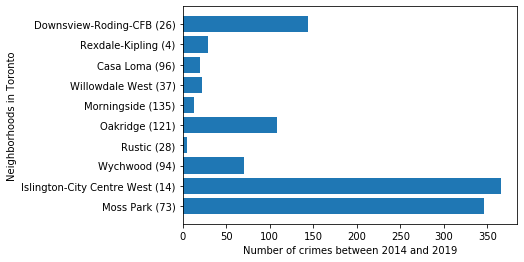

In [7]:
import matplotlib.pyplot as plt

sample=df_neighb.sample(10,random_state=10)
height = sample['premisetype']
bars = sample['Neighborhood']
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
plt.xlabel('Number of crimes between 2014 and 2019')
plt.ylabel('Neighborhoods in Toronto') 
# Show graphic
plt.show()


### Selecting neighborhoods with less than 30 crimes

In [9]:
df_neighb=df_neighb[df_neighb['premisetype'] < 30].reset_index(drop=True) 
print('There are {} neighborhoods with less than 30 breaks and entering between 2014 and 2019'.format(df_neighb.shape[0]))
df_neighb.tail()

There are 36 neighborhoods with less than 30 breaks and entering between 2014 and 2019


,Neighborhood,premisetype
31,Black Creek (24),26
32,Newtonbrook East (50),27
33,Ionview (125),27
34,Mount Dennis (115),27
35,Rexdale-Kipling (4),29


### Getting back coordinates of the 36 'safe' neighboorhoods

In [12]:
f=dfcrime
f=f.set_index('Neighborhood')
good_neighb=f.loc[df_neighb['Neighborhood'],['Lat','Long']]
good_neighb.reset_index(drop=False)
good_neighb=good_neighb.groupby(['Neighborhood']).mean().reset_index()
good_neighb["Neighborhood"]=good_neighb["Neighborhood"].str.replace("(\(.*?\))", "").str.strip()
good_neighb

,Neighborhood,Lat,Long
0,Bayview Woods-Steeles,43.796005,-79.383685
1,Black Creek,43.766580,-79.520558
2,Blake-Jones,43.676772,-79.339165
3,Bridle Path-Sunnybrook-York Mills,43.732579,-79.385153
4,Broadview North,43.687833,-79.353198
5,Caledonia-Fairbank,43.689843,-79.453226
6,Casa Loma,43.681649,-79.409804
7,Danforth East York,43.689513,-79.331019
8,Don Valley Village,43.782508,-79.352255
9,Edenbridge-Humber Valley,43.670956,-79.521711


In [9]:
good_neighb.to_excel(r'C:\Users\hp\Documents\ibm data science\capstone\good neighborhoods.xlsx', index = False)

### Showing map with locations of the 36 neighborhoods

In [13]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[43.7001114, -79.4162979], zoom_start=10)

# add markers to map
for lat, lng, label in zip(good_neighb['Lat'], good_neighb['Long'], good_neighb['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto    

### Writing function to retrive venues from Foursquare

In [14]:
CLIENT_ID =  '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [15]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
toronto_venues = getNearbyVenues(names=good_neighb['Neighborhood'],
                                   latitudes=good_neighb['Lat'],
                                   longitudes=good_neighb['Long'],
                                   radius=500,
                                   )
print('Total number of venues retrieved: ',toronto_venues.shape[0])
print('\nThere are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

Total number of venues retrieved:  261

There are 102 uniques categories.


### Table contaning neighborhoods and their venues

In [17]:
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bayview Woods-Steeles,43.796005,-79.383685,Bestview Hiking Trails,43.797368,-79.382227,Trail
1,Bayview Woods-Steeles,43.796005,-79.383685,Baseball Fields/Park,43.795644,-79.385214,Dog Run
2,Bayview Woods-Steeles,43.796005,-79.383685,Don Valley Parklands,43.792490,-79.380347,Park
3,Black Creek,43.766580,-79.520558,Petro-Canada,43.766586,-79.519870,Gas Station
4,Black Creek,43.766580,-79.520558,Rexall,43.766590,-79.519852,Pharmacy
...,...,...,...,...,...,...,...
256,Woodbine-Lumsden,43.693936,-79.312704,The Beer Store,43.693731,-79.316759,Beer Store
257,Woodbine-Lumsden,43.693936,-79.312704,Luxy Nails,43.692856,-79.315849,Spa
258,Woodbine-Lumsden,43.693936,-79.312704,Stan Wadlow Park,43.697836,-79.314303,Park
259,Woodbine-Lumsden,43.693936,-79.312704,New Star Video,43.692565,-79.315937,Video Store


In [55]:
toronto_venues.to_excel(r'C:\\Users\hp\Documents\ibm data science\capstone\neighborhoods venues4.xlsx', index = False)

In [81]:
toronto_venues = pd.read_excel(r'C:\Users\hp\Documents\ibm data science\capstone\neighborhoods venues.xlsx')

### Grouping neighborhoods by their unique venue category

In [82]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 
#toronto_onehot.columns.get_loc("Neighborhood")
# move neighborhood column to the first column
#fixed_columns = [toronto_onehot2.columns[-1]] + list(toronto_onehot2.columns[:-1])
#toronto_onehot2 = toronto_onehot2[fixed_columns]
toronto_onehot.head()

,Airport Service,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bakery,Bank,Baseball Field,...,Swim School,Tennis Court,Thrift / Vintage Store,Toy / Game Store,Trail,Transportation Service,Turkish Restaurant,Video Store,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalizing previous table

In [83]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Airport Service,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bakery,Bank,...,Swim School,Tennis Court,Thrift / Vintage Store,Toy / Game Store,Trail,Transportation Service,Turkish Restaurant,Video Store,Wine Shop,Women's Store
0,Bayview Woods-Steeles,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
1,Black Creek,0.0,0.000000,0.0,0.000000,0.111111,0.000000,0.0,0.000000,0.111111,...,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
2,Blake-Jones,0.0,0.000000,0.0,0.028571,0.000000,0.028571,0.0,0.000000,0.000000,...,0.00,0.0,0.0,0.028571,0.0,0.0,0.028571,0.0,0.000000,0.0
3,Bridle Path-Sunnybrook-York Mills,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.25,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
4,Broadview North,0.0,0.076923,0.0,0.000000,0.000000,0.000000,0.0,0.153846,0.076923,...,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.076923,0.0


### Getting the most common venues for each neighborhood

In [84]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [94]:
import numpy as np
num_top_venues = 4

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(8)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Bayview Woods-Steeles,Park,Dog Run,Women's Store,Construction & Landscaping
1,Black Creek,Grocery Store,Bank,Pharmacy,Shopping Mall
2,Blake-Jones,Coffee Shop,Café,Greek Restaurant,Beer Bar
3,Bridle Path-Sunnybrook-York Mills,Gym / Fitness Center,Café,Restaurant,Swim School
4,Broadview North,Bakery,Bank,Greek Restaurant,Sandwich Place
5,Caledonia-Fairbank,Park,Women's Store,Bakery,Dog Run
6,Casa Loma,Park,History Museum,Steakhouse,Castle
7,Danforth East York,Coffee Shop,Athletics & Sports,Sandwich Place,Italian Restaurant


### Estimating number of cluster with elbow method

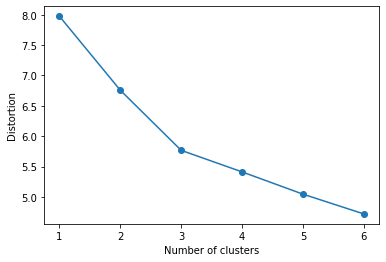

In [93]:
from sklearn.cluster import KMeans 
ks = []
distortions = []
labels=[]
X=toronto_grouped.drop('Neighborhood', 1)
n=6 #number of clusters 
for kclusters in range (1,n+1):
    kmeans = KMeans(n_clusters=kclusters, random_state=10).fit(X)
    ks.append(kclusters)
    distortions.append(kmeans.inertia_)
    #ks_distortions = pd.DataFrame({'Number of Clusters': ks, 'Distortion': distortions})
    labels.append(kmeans.labels_)
#ks_distortions
# plot

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.plot(range(1, n+1), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Adding cluster labels to previous table

In [95]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', labels[2])

toronto_merged = good_neighb

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood',how='right')

toronto_merged.head(20) # check the last columns!

,Neighborhood,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Bayview Woods-Steeles,43.796005,-79.383685,0,Park,Dog Run,Women's Store,Construction & Landscaping
1,Black Creek,43.766580,-79.520558,1,Grocery Store,Bank,Pharmacy,Shopping Mall
2,Blake-Jones,43.676772,-79.339165,1,Coffee Shop,Café,Greek Restaurant,Beer Bar
3,Bridle Path-Sunnybrook-York Mills,43.732579,-79.385153,1,Gym / Fitness Center,Café,Restaurant,Swim School
4,Broadview North,43.687833,-79.353198,1,Bakery,Bank,Greek Restaurant,Sandwich Place
5,Caledonia-Fairbank,43.689843,-79.453226,0,Park,Women's Store,Bakery,Dog Run
6,Casa Loma,43.681649,-79.409804,1,Park,History Museum,Steakhouse,Castle
7,Danforth East York,43.689513,-79.331019,1,Coffee Shop,Athletics & Sports,Sandwich Place,Italian Restaurant
8,Don Valley Village,43.782508,-79.352255,1,Baseball Field,Fast Food Restaurant,Bakery,Beer Store
9,Edenbridge-Humber Valley,43.670956,-79.521711,0,Dog Run,Park,Fast Food Restaurant,Women's Store


### Showing clusters on map

In [96]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[43.7001114, -79.4162979], zoom_start=11)
kclusters=3
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Lat'], toronto_merged['Long'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Showing information of clusters

In [97]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + list(range(1, toronto_merged.shape[1]))]]

,Neighborhood,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Bayview Woods-Steeles,43.796005,-79.383685,0,Park,Dog Run,Women's Store,Construction & Landscaping
5,Caledonia-Fairbank,43.689843,-79.453226,0,Park,Women's Store,Bakery,Dog Run
9,Edenbridge-Humber Valley,43.670956,-79.521711,0,Dog Run,Park,Fast Food Restaurant,Women's Store
14,Forest Hill South,43.693905,-79.415058,0,Playground,Park,Furniture / Home Store,Discount Store
17,Humber Heights-Westmount,43.691419,-79.522331,0,Pizza Place,Park,Grocery Store,Coffee Shop
20,Kingsway South,43.653247,-79.510498,0,Lounge,Park,Pool,Garden
21,Lambton Baby Point,43.658649,-79.495432,0,Garden,Park,Mini Golf,Women's Store
34,Willowdale West,43.771972,-79.426922,0,Park,Mobile Phone Shop,Women's Store,Grocery Store


In [98]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + list(range(1, toronto_merged.shape[1]))]]

,Neighborhood,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
1,Black Creek,43.766580,-79.520558,1,Grocery Store,Bank,Pharmacy,Shopping Mall
2,Blake-Jones,43.676772,-79.339165,1,Coffee Shop,Café,Greek Restaurant,Beer Bar
3,Bridle Path-Sunnybrook-York Mills,43.732579,-79.385153,1,Gym / Fitness Center,Café,Restaurant,Swim School
4,Broadview North,43.687833,-79.353198,1,Bakery,Bank,Greek Restaurant,Sandwich Place
6,Casa Loma,43.681649,-79.409804,1,Park,History Museum,Steakhouse,Castle
7,Danforth East York,43.689513,-79.331019,1,Coffee Shop,Athletics & Sports,Sandwich Place,Italian Restaurant
8,Don Valley Village,43.782508,-79.352255,1,Baseball Field,Fast Food Restaurant,Bakery,Beer Store
10,Elms-Old Rexdale,43.720571,-79.551032,1,Caribbean Restaurant,Business Service,Mobile Phone Shop,Women's Store
11,Englemount-Lawrence,43.718316,-79.435479,1,Shoe Store,Breakfast Spot,Liquor Store,Department Store
12,Etobicoke West Mall,43.644544,-79.569018,1,Farmers Market,Transportation Service,History Museum,Coffee Shop


In [99]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0] + list(range(1, toronto_merged.shape[1]))]]

,Neighborhood,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
30,Princess-Rosethorn,43.666851,-79.543207,2,Playground,Women's Store,Dog Run,Coffee Shop


### function to get commercial offices in neighborhoods

In [101]:
def getNearbyoffices(names, latitudes, longitudes, radius=500, categoryIds=''):
    try:
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):
            #print(name)

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

            if (categoryIds != ''):
                url = url + '&categoryId={}'
                url = url.format(categoryIds)

            # make the GET request
            response = requests.get(url).json()
            results = response["response"]['venues']

            # return only relevant information for each nearby venue
            for v in results:
                success = False
                try:
                    category = v['categories'][0]['name']
                    success = True
                except:
                    pass

                if success:
                    venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['name'], 
                        v['location']['lat'], 
                        v['location']['lng'],
                        v['categories'][0]['name']
                    )])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    except:
        print('no results')

    return(nearby_venues)

### Selecting neighborhoods from cluster 0 that meet client's requirements

In [102]:
neigbh_park=toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + list(range(1, toronto_merged.shape[1]))]]

In [105]:
neigbh_park=neigbh_park[neigbh_park['1st Most Common Venue'].str.contains('Park')].reset_index(drop=True)
neigbh_park

,Neighborhood,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Bayview Woods-Steeles,43.796005,-79.383685,0,Park,Dog Run,Women's Store,Construction & Landscaping
1,Caledonia-Fairbank,43.689843,-79.453226,0,Park,Women's Store,Bakery,Dog Run
2,Willowdale West,43.771972,-79.426922,0,Park,Mobile Phone Shop,Women's Store,Grocery Store


### Retrieving commercial offices for the 3 neighborhoods using foursquare

In [106]:
neigbh_park_offices = getNearbycolleges(names=neigbh_park['Neighborhood'],
                                   latitudes=neigbh_park['Lat'],
                                   longitudes=neigbh_park['Long'],
                                   radius=500,
                                   categoryIds='4d4b7105d754a06375d81259')

# Results
#### Neighborhood Caledonia-Fairbank meets client's requirements

In [107]:
neigbh_park_offices

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bayview Woods-Steeles,43.796005,-79.383685,Grandma's,43.795656,-79.385236,Coworking Space
1,Bayview Woods-Steeles,43.796005,-79.383685,Lester B. Pearson Elementary School,43.793185,-79.387125,School
2,Bayview Woods-Steeles,43.796005,-79.383685,St Paschal Baylon,43.792024,-79.387347,School
3,Bayview Woods-Steeles,43.796005,-79.383685,Dr. Kim's Clinic of Psychiatry,43.793283,-79.383108,Doctor's Office
4,Bayview Woods-Steeles,43.796005,-79.383685,"Beacon Corporation, Brokerage",43.797786,-79.388842,Office
5,Caledonia-Fairbank,43.689843,-79.453226,Fairbank Memorial School,43.691570,-79.454362,Elementary School
6,Caledonia-Fairbank,43.689843,-79.453226,Serenity Therapeutics,43.692236,-79.445438,Professional & Other Places
7,Caledonia-Fairbank,43.689843,-79.453226,St. John Bosco Catholic Elementary School,43.688929,-79.450976,School
8,Caledonia-Fairbank,43.689843,-79.453226,The Met Towers,43.692550,-79.449565,Building
9,Caledonia-Fairbank,43.689843,-79.453226,Montana Steele,43.691724,-79.448141,Building


### Couting number of offices for each neighborhood

In [108]:
df_count=neigbh_park_offices.groupby(['Neighborhood']).count().drop(['Neighborhood Latitude', 
                  'Neighborhood Longitude',  
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'],axis=1).sort_values(by=['Venue'],ascending=False).reset_index()
df_count

,Neighborhood,Venue
0,Caledonia-Fairbank,18
1,Willowdale West,9
2,Bayview Woods-Steeles,5


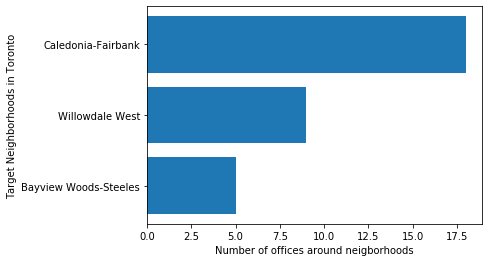

In [110]:
df_count.sort_values(by=['Venue'],inplace=True)
height = df_count['Venue']
bars = df_count['Neighborhood']
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
plt.xlabel('Number of offices around neigborhoods')
plt.ylabel('Target Neighborhoods in Toronto')  
# Show graphic
plt.show()

### Showing location of neighborhood that meets all client's requirements

In [114]:
map_toronto = folium.Map(location=[43.7001114, -79.4162979], zoom_start=10)

# add markers to map

label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
        [43.689843, -79.453226],
        radius=5,
        popup='Caledonia-Fairbank',
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto    

## Discussions and Recommendations

There are some arbitrary choices I make in this project that impact the selection of neighborhoods that meet the client’s requirements. First, I only use data for one type of crime (break & enter) to analyze the neighborhoods.  Adding other types of crimes such as theft can impact the final result. Second, I only select the neighborhoods with less than 30 crimes in a 5-year period. Increasing the cutoff from 30 to 50 crimes can change the results. 

The datasets used in the analysis are constantly changing (i.e., new crimes, new venues.) Different datasets can also be added such data on rent prices if cost was a client’s requirement.  These changes can alter the results. 

I use k-means method to group the neighborhoods based on their venue types. It is recommended that you insert a seed in your code to reproduce the same results. Every time you run k-means, results change because the positions of the center of the clusters also change.

One of the clusters contain the desired most common venue type, parks. If for some reason, none of the clusters contains the desired most common venue type, one can manually select the neighborhoods with the desired venue type from the table containing all the venue types. 


## Conclusion

I used crime data in Toronto and foursquare venue data to identify a neighborhood that meets all the client’s requirements to open a restaurant. The analysis made in this project can be easily modified to satisfy requirements of another client to open a different business.